# Clustering/Unsupervised Learning/Semi-supervised Learning

## Agenda
- k-means. 
- Unsupervised learning extensions.  
- Agglomative clustering.  
- Density based clustering.  
- Topic modeling.

## Unsupervised Learning
Clustering and data mining

## Semi-supervised Learning

# Clustering
Following [*Python Machine Learning 3rd Edition, Chapter 11*](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch11) and [*Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Chapter 9*](https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb).

<img src='./diagrams/unsupervised-clustering.png' style='height: 500px'>

[Image source Machine Learning with Python 3rd Edition](https://github.com/rasbt/python-machine-learning-book-3rd-edition)

- We need clustering when we don't have class labels, making this an unsupervised problem.  
- When we need to discover a latent or hidden structure. We may have a hypothesis on what this structure might be in logical terms, but in reality most of the algorithms are going to be looking at maximizing distance between centroids.  
- Clusters should contain examples that are more similar to each other than in different clusters.  

## When might we need to use clustering?
- Determine documents that are similar to each other.  
- Group songs when we don't have information on their genre.  
- Generation tasks, where should this new sample belong?  
- Customer segmentation for marketing campaigns.  
- Determine outliers in higher dimension datasets.  
- Need to flag high-risk credit card transactions.  

## General practices
- Most clustering algorithms use `distance` in some manner. Therefore, it is a best practice to `scale` your data prior to using these algorithms. Since distance will be influenced by absolute magnitudes, it is crucial you don't skip this step (and you shouldn't be skipping it for other modeling tasks either!).  
- To visually inspect the clustering, a standard practice is to use dimensionality reduction (e.g., `principle component analysis`) to remove some of the background noise in the data.  
- Another standard practice is to use dimensionality reduction to compress the feature space to 2 or 3 dimensions in order to visualize the separation in the clusters - though the preceived distance in 2 dimensions may not be reflect of the absolute or relative difference in the full $d$-dimensional space.  
- We'll need a subject matter expert (SME) to review our results and determine the purity of the clusters. If you had some labeled examples you could get a sense of purity using those, but in many cases you'll need some type of feedback loop with reviewers.

## Primary types of Clustering
- Prototype-based (e.g., k-means) clustering. 
- Hierarchical (agglomerative) clustering.  
- Density-based clustering.  
- Graph-based clustering.  

# k-Means Clustering
- Type of `prototype-based` clustering - it needs a prototype or model for each cluster that is usually a centroid (mean/center) or medoid (median).  
- Identifies spherical shapes well.  
- Every example gets assigned a cluster, even if it is a true outlier.  
- Biggest downside is you need to tell the algorithm how many clusters there are...  
- A bad decision for the number of clusters ($k$) and our performance will be poor.  

Demonstrate on the `iris` data:

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = iris.data
iris_label = iris.target

iris_df[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

#### Squeeze to 2-dimensions for visualizing
We'll use PCA to reduce the dataset to 2-dimensions.  
- Scale the data.    
- Apply PCA to reduce to 2-dimensions.  
- Plot the data

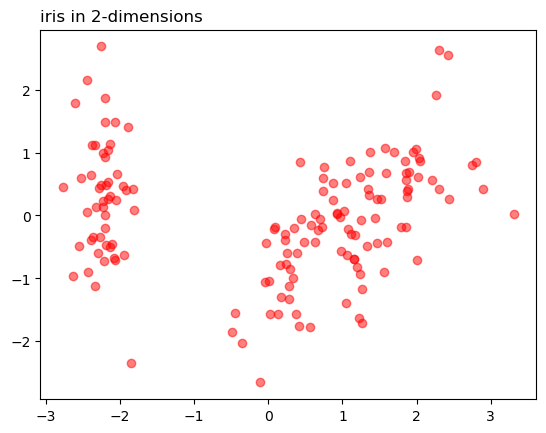

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

iris_p = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(n_components=2))
                  ])

iris_2d = iris_p.fit_transform(iris_df)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(iris_2d[:,0], iris_2d[:,1], 'ro', alpha=0.5)
plt.title('iris in 2-dimensions', loc='left')
plt.show()

> We know there are 3 classes of `iris` but if we didn't have that info, we would probably assume there are 2 based on this plot.

## Basic Process with k-means
- Pick $k$. 
- Pick $k$ centroids randomly and assign as the initial centers.  
- Assign each example to the nearest cluster, based on `distance`.  
- Move the centroids to the center of the examples that were assigned to it.  
- Repeat until the centroids stop changing, either based on a tolerance or iteration threshold.  

### Distance
Usually this will be `squared Euclidean distance`, where $j$ is the $j$th dimension:

$$
d(x,y)^2 = \sum_{j=1}^{m}(x_j - y_j)^2 = ||x-y||_2^2
$$

### Minimizing within-cluster errors
Going to minimize the within-cluster errors using the `sum of squared errors`, leveraging `Euclidean distance`.

$$
SSE = \sum_{i=1}^{n}{\sum_{j=1}^{k}}w^{(i,j)}||x^{(i)}-\mu^{(j)}||_2^2
$$

$\mu^{j}$ is the $j$th centroid, $i$ is for the $i$-th example, $w^{(i,j)}$ is an indicator for belonging to the cluster:

$$
\begin{equation}
w^{(i,j)}
=
\begin{cases}
1, & \text{if}\ x^{(i)}\in j \\
0, & \text{otherwise}
\end{cases}
\end{equation}
$$

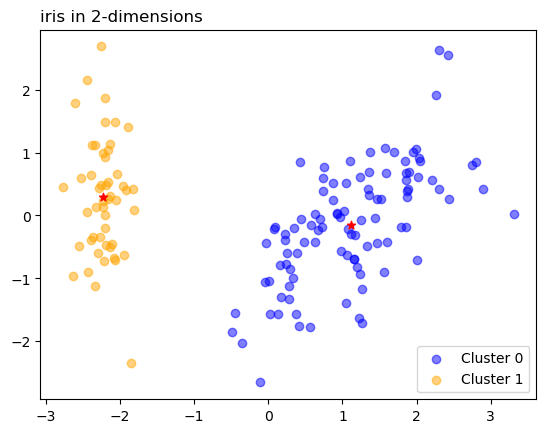

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2, init='random', n_init='auto')
km = km.fit(iris_2d)
iris_cluster = km.predict(iris_2d)

import matplotlib.pyplot as plt
%matplotlib inline

def scatter(class_, color):
    plt.scatter(iris_2d[iris_cluster == class_, 0], 
                iris_2d[iris_cluster == class_, 1], color=color,
                alpha=0.5,
                label= f'Cluster {class_}'
               )

scatter(0, 'blue')
scatter(1, 'orange')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'red', marker='*')

plt.title('iris in 2-dimensions', loc='left')
plt.legend()

plt.show()

- Looked like it did a reasonable job.  
- This was easy since there was so much separation between clusters.  

### What if we tried 3 classes

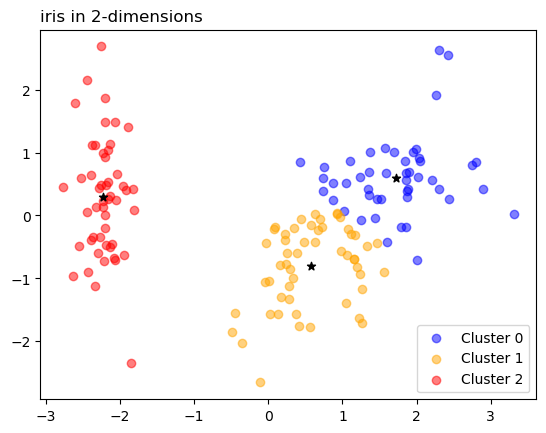

In [17]:

km = KMeans(n_clusters = 3, init='random', n_init='auto')
km = km.fit(iris_2d)
iris_cluster = km.predict(iris_2d)

import matplotlib.pyplot as plt
%matplotlib inline

def scatter(class_, color):
    plt.scatter(iris_2d[iris_cluster == class_, 0], 
                iris_2d[iris_cluster == class_, 1], color=color,
                alpha=0.5,
                label= f'Cluster {class_}'
               )

scatter(0, 'blue')
scatter(1, 'orange')
scatter(2, 'red')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'black', marker='*')

plt.title('iris in 2-dimensions', loc='left')
plt.legend()

plt.show()

Not that this may not line up like supervised learning as assigned cluster number may not match

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(iris_label, iris_cluster)

array([[ 0,  0, 50],
       [11, 39,  0],
       [36, 14,  0]])

### Now what?
- Might be useful to join back to the original data and see if there are commonalities among some of the features.
- Pass it on to a SME to review.  

# k-Means++
- Ordinary k-Means randomly sets the initial centroids, which could be very poor.  
- Could lead to bad performance and/or slow convergence.  
- Similar to cross-validation, we can run k-Means multiple times and pick the best in terms of the `sum of squared errors`.  
- This has been proven to be more consistent and have better general performance in literature.

### Basic Process:
- Create a list, $M$, to store the $k$ centroids.  
- Randomly choose first centroid, $\mu^{(j)}$, from the examples and add to $M$.  
- For examples not in $M$, find the minimum squared distance to the centroids in $M$.  
- Randomly select the next centroid, $\mu^{(p)}$ using a weighted sampling distribution and repeat above. The sampling distribution ensures instances farther away from existing centroids are more likely to be new centroids.
- Run normal k-means.

To use `init=k-means++` in the algorithm, which is actually the default.

You can use specify default values for the initial centroids, but that would be probably pretty rare that you would have a guess for those, especially with higher dimension data.

# Another k-Means example
This will use a generated blob dataset.

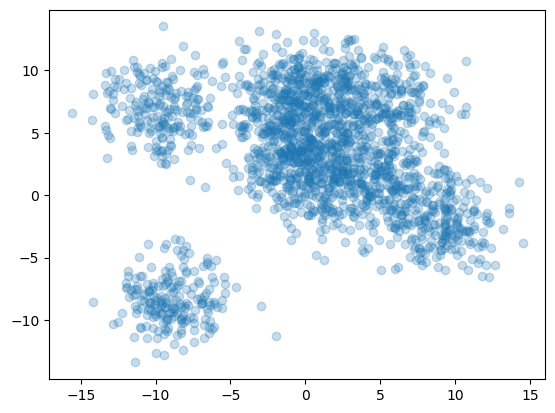

In [19]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=2000, 
                  n_features=2, 
                  centers=10, 
                  cluster_std=2,
                  shuffle=True,
                  random_state=0
                 )

plt.scatter(X[:,0], X[:,1], alpha=.25)
plt.show()

# What should be set for $k$?  
We have two primary tools to determine a reasonable number to set $k$:
- Elbow plot. 
- Silhouette plot.  

### Elbow plot
- Think of this as a type of grid search for clustering.  
- We don't have evaluation metrics, e.g., recall, that we can look to maximize, so we need to use metrics intrinsic to the clusters and data.  
- We use the within-cluster SSE (`inertia` or `distortion`) and look to see that reaches a convergence point. inertia_ is available after fitting a model.

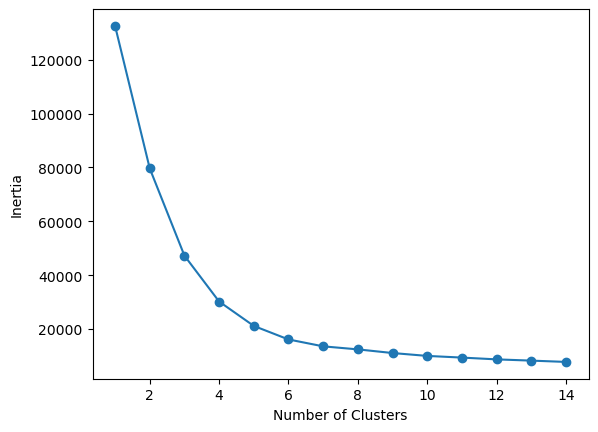

In [20]:
from sklearn.cluster import KMeans

distortions = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

> Plot `elbows` or `kinks` at around $6$, $7$ or $8$ so we'll use that for $k$.

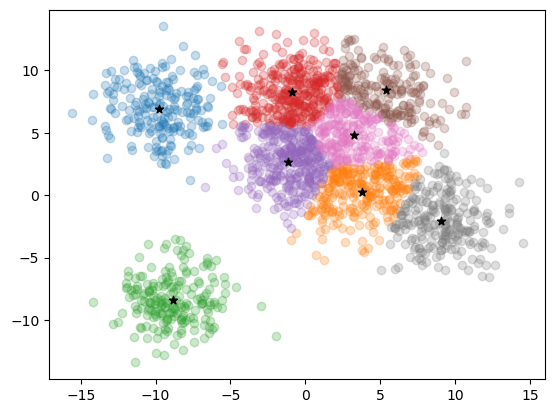

In [24]:
from sklearn.cluster import KMeans

n = 8

km = KMeans(n_clusters=n, random_state=0, n_init='auto')
km = km.fit(X)
pclusters = km.predict(X)

for i in range(n):
    plt.scatter(X[pclusters==i, 0], X[pclusters==i, 1], alpha=0.25)
    
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'black', marker='*')

plt.show()

> Elbow method seemed to pick a reasonable number?

## Silhouette Plot
Another method for chosing $k$. It's a measure of how tightly grouped the estimates within clusters.

#### Steps
- Calculate cluster cohesion, $a^{(i)}$, which is the average distance between a sample and all other samples in the cluster. The smaller, the tighter there are together.  
- Calculate the cluster separation, $b^{(i)}$, which is the average distance between each sample in a cluster versus the examples in the nearest cluster.  
- Calculate the silhouette, which is the distance between the cluster cohesion and the separation, divided by the greater of the two.

$$
s^{(i)} = \frac{b^{(i)}-a^{(i)}}{max(b^{(i)}, a^{(i)})}
$$

Where $s\in(-1,1)$
- A value of $1$ indicates an ideal cluster, since the clusters are dissimilar from each other.  
- A value of $0$ indicates the within and between separation is the same, so the clusters are similar to each other (we don't want this).

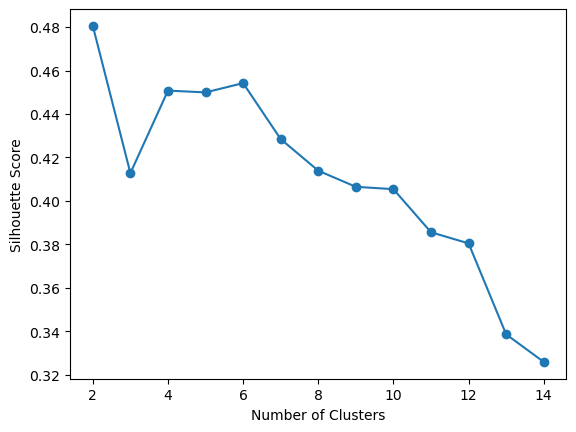

In [25]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouettes = list()

for i in range(2, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X)
    s = silhouette_score(X, km.labels_)
    silhouettes.append(s)
    
plt.plot(range(2,15), silhouettes, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

> Probably would ignore $2$ since it probably is separating the top and bottom blob. It materially begins to decline after $6$ or $10$, so we'd likely use that for $k$.

In [26]:
from sklearn.metrics import silhouette_samples

from sklearn.cluster import KMeans

n = 10

km = KMeans(n_clusters=n, random_state=0, n_init='auto')
km = km.fit(X)
pclusters = km.predict(X)

silhouette_vals = silhouette_samples(X, km.labels_)

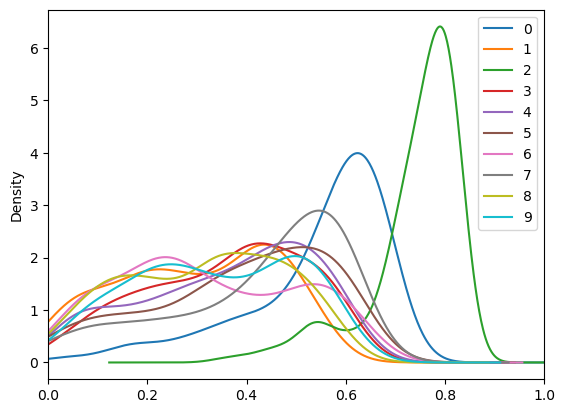

In [27]:
import pandas as pd

s_vals = pd.DataFrame(list(zip(silhouette_vals, km.labels_)))
s_vals.columns = ['silhouette', 'cluster']
s_vals = s_vals.sort_values(by=['cluster', 'silhouette'],
                          ascending=[True, False]
                          )
s_vals['idx'] = pd.Series(range(0,2000))
s_vals['cluster'] = s_vals['cluster'].astype(str)

s_vals.groupby('cluster')['silhouette'].plot.density()
plt.legend()
plt.xlim((0,1))
plt.show()

> Plot the individual values by cluster to identify potential outliers.

- Data points near $0$ are less like the examples in the cluster.  
- Heavy density near $1$ indicates the cluster is grouping similar examples and is dissimilar from other clusters.

You may also see silhouette plots like this:

<img src='./diagrams/silhouette.png' style='width: 500px'>

[Image source: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Chapter 9](https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb)

### You can also use clustering for preprocessing
Since this can be used to generate a single data point per example from many, this could be used for dimension reduction in addition to segmentation.

Why it may help?
- Noise reduction.  
- Dimensionality reduction. 

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()
dX, dy = digits['data'], digits['target']

from sklearn.model_selection import train_test_split
dX_train, dX_test, dy_train, dy_test = train_test_split(dX, 
                                                        dy,
                                                        test_size=0.2,
                                                        random_state=100
                                                       )

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg = log_reg.fit(dX_train, dy_train)

log_reg_score = log_reg.score(dX_test, dy_test)
print(f'Score: {log_reg_score:.2%}')

Score: 95.83%


In [29]:
dX.shape

(1797, 64)

In [30]:
dX[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

#### Now we'll see using the clusters from k-Means

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

p = Pipeline([('sc', StandardScaler()),
             ('kmeans', KMeans(n_clusters=100, n_init='auto')),
              ('logreg', LogisticRegression(solver='liblinear'))])

p = p.fit(dX_train, dy_train)
p_score = p.score(dX_test, dy_test)
print(f'Using k-means preprocesser: {p_score:.2%}')

Using k-means preprocesser: 97.78%


- You could use GridSearchCV to find the best number of clusters.  
- We picked $100$ based on literature on this dataset, but you would want to search for the best values.

# Another Application: Semi-Supervised Learning

In [32]:
dataStr = """
Height (inches)	Hair length (inches)	initials
69	1.1	ms
67	0	jw
69	2	SN
64	8	SY
68	2	RR
72	24	CB
70	1.4	AK
68	1	OP
68.4	2.5	YK
60	12	GV
64	2	md
66	12	MJ
64	24	BV
62	20	SM
73.2	3	CV
64	20	SD
69	3	AV
60	26	SKM
66	16	MD
66	2	RT
73	4	MK
71	6	HP
76	3	VJ
64	10	NH
72	6	SP
65	15	AJ
60	20	ST
"""

from io import StringIO
import pandas as pd

dataio = StringIO(dataStr)

df = pd.read_csv(dataio, sep="\t")

df.sort_values(by=df.columns[1], inplace=True)
df

,Height (inches),Hair length (inches),initials
1,67.0,0.0,jw
7,68.0,1.0,OP
0,69.0,1.1,ms
6,70.0,1.4,AK
19,66.0,2.0,RT
10,64.0,2.0,md
4,68.0,2.0,RR
2,69.0,2.0,SN
8,68.4,2.5,YK
14,73.2,3.0,CV


In [33]:
X = df[['Height (inches)', 'Hair length (inches)']]
X.head()

,Height (inches),Hair length (inches)
1,67.0,0.0
7,68.0,1.0
0,69.0,1.1
6,70.0,1.4
19,66.0,2.0


In [40]:
n_clusters = 4
ph = Pipeline([('sc', StandardScaler()),
             ('kmeans', KMeans(n_clusters=n_clusters, n_init='auto'))])


ph.fit(X)

df['cluster'] = ph.predict(X)
df

,Height (inches),Hair length (inches),initials,cluster,gender
1,67.0,0.0,jw,1,M
7,68.0,1.0,OP,1,M
0,69.0,1.1,ms,1,M
6,70.0,1.4,AK,1,M
19,66.0,2.0,RT,1,M
10,64.0,2.0,md,1,M
4,68.0,2.0,RR,1,M
2,69.0,2.0,SN,1,M
8,68.4,2.5,YK,1,M
14,73.2,3.0,CV,3,M


In [41]:
ph['kmeans'].cluster_centers_

array([[ 1.18381561,  1.79333272],
       [ 0.18706771, -0.89265144],
       [-0.92904597,  0.90639951],
       [ 1.43300259, -0.56744259]])

In [42]:
X_dist = ph.transform(X)
X_dist

array([[3.12916068, 0.28711545, 2.20277288, 1.54118776],
       [2.93139916, 0.09261984, 2.20903065, 1.27514799],
       [2.85037615, 0.28718116, 2.33349968, 1.04642426],
       [2.76397668, 0.51880208, 2.45697709, 0.81309581],
       [3.01470517, 0.4423476 , 1.88781092, 1.71139484],
       [3.27046084, 0.92078427, 1.77378302, 2.18521459],
       [2.8178461 , 0.05268181, 2.10728028, 1.24171576],
       [2.74561285, 0.28027835, 2.24750057, 1.01023734],
       [2.72950366, 0.16519239, 2.11243721, 1.1350669 ],
       [2.54569142, 1.29378158, 2.90853096, 0.17292971],
       [2.70488957, 1.96141938, 3.48287556, 0.72899544],
       [2.62955526, 0.31901128, 2.15431843, 0.98257335],
       [2.42084093, 1.26700777, 2.80189891, 0.04912311],
       [2.18125862, 0.91734133, 2.26944518, 0.52540946],
       [2.16805896, 1.12327774, 2.47092438, 0.31501387],
       [2.71811869, 1.19262179, 1.05854158, 2.20898572],
       [2.55298061, 1.35866486, 0.82302333, 2.26860281],
       [3.21808553, 2.25118373,

In [43]:
import numpy as np 

representative_idx = np.argmin(X_dist, axis=0)
representative_idx

array([25,  6, 22, 12])

In [44]:
df['gender'] = None

cluster=0
for idx in representative_idx:
#     print(idx)
    print(df[idx:idx+1])
    gender = input()
    df['gender'] = [ gender if c == cluster else g  for c, g in zip(df['cluster'], df['gender'])]
    cluster+=1
    print('----------------------')
    
df

   Height (inches)  Hair length (inches) initials  cluster gender
5             72.0                  24.0       CB        0   None


 M


----------------------
   Height (inches)  Hair length (inches) initials  cluster gender
4             68.0                   2.0       RR        1   None


 M


----------------------
    Height (inches)  Hair length (inches) initials  cluster gender
15             64.0                  20.0       SD        2   None


 F


----------------------
    Height (inches)  Hair length (inches) initials  cluster gender
20             73.0                   4.0       MK        3   None


 M


----------------------


,Height (inches),Hair length (inches),initials,cluster,gender
1,67.0,0.0,jw,1,M
7,68.0,1.0,OP,1,M
0,69.0,1.1,ms,1,M
6,70.0,1.4,AK,1,M
19,66.0,2.0,RT,1,M
10,64.0,2.0,md,1,M
4,68.0,2.0,RR,1,M
2,69.0,2.0,SN,1,M
8,68.4,2.5,YK,1,M
14,73.2,3.0,CV,3,M


In [39]:
(len(df) -  1 ) / len(df) 

0.9629629629629629

## Back to digits dataset
Let's pretend we only had 50 labeled images for the digits dataset.  
- Something like this is somewhat common, especially with text or images.

In [45]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(dX_train, dy_train)

all_n_score = log_reg.score(dX_test, dy_test)
print(f'Accuracy with all training examples: {all_n_score:.2%}')

Accuracy with all training examples: 95.83%


In [46]:
n_labeled = 50

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(dX_train[:n_labeled], dy_train[:n_labeled])

small_n_score = log_reg.score(dX_test, dy_test)
print(f'Accuracy with only 50 training examples: {small_n_score:.2%}')

Accuracy with only 50 training examples: 80.00%


> Accuracy much lower than with the full training dataset.

#### What if we create labels from the clusters?
We label other instances that are really close to centroids after running k-Means?

First, we'll need to determine clusters, then determine which labeled instance is closest to the centroid.

[Taken from *Hands on Machine Learning with Scikit-Learn, Keras & TensorFlow pages 253-254*](https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb)

In [47]:
import numpy as np

k = 50

kmeans = KMeans(n_clusters = k, n_init='auto')
X_digits_dist = kmeans.fit_transform(dX_train)
X_digits_dist

array([[47.76344949, 32.69986338, 47.52720757, ..., 39.83119387,
        49.03054294, 53.24482585],
       [47.5278083 , 47.74262234, 41.86346551, ..., 44.55880349,
        47.15394088, 45.27231945],
       [44.40804409, 45.32078301, 39.31075501, ..., 44.66299659,
        42.39539056, 46.75862084],
       ...,
       [54.71564358, 39.38532902, 48.16541174, ..., 44.31710152,
        47.47032379, 46.77694847],
       [56.37521875, 41.29039174, 55.22725545, ..., 39.51143676,
        46.40777565, 47.10107727],
       [38.15377758, 26.10136136, 33.7244045 , ..., 37.02058894,
        37.77309414, 45.06040447]])

In [62]:
# kmeans.cluster_centers_

In [49]:
# digit with smallest distance
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
representative_digit_idx

array([ 279,  255,  897, 1256,  239,  355, 1372,  479, 1213,   52,  881,
        841,  218,  308,  838, 1180,  266,  968,  561,  807, 1408,  439,
        978,  423,  113,  609,  862, 1317, 1145,  706,  129,  160, 1245,
        115,  597,  228,  990, 1281,   42,  205,  956, 1327,   60,  833,
        727, 1046,  984,  673, 1220, 1125])

In [50]:
X_representative_digits = dX_train[representative_digit_idx]
X_representative_digits

array([[ 0.,  0.,  0., ..., 11.,  0.,  0.],
       [ 0.,  0.,  7., ..., 10.,  1.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  9., ...,  1.,  0.,  0.],
       [ 0.,  0.,  5., ...,  8.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.]])

In [51]:
dy_train[representative_digit_idx]

array([1, 8, 7, 8, 5, 0, 4, 6, 3, 4, 5, 1, 2, 5, 2, 7, 5, 0, 8, 3, 8, 1,
       6, 9, 2, 3, 8, 0, 1, 9, 7, 9, 7, 1, 4, 4, 3, 7, 1, 9, 6, 2, 7, 3,
       6, 5, 1, 5, 1, 6])

In [52]:
pd.Series(dy_train[representative_digit_idx]).value_counts()

1    8
7    6
5    6
8    5
6    5
3    5
4    4
2    4
9    4
0    3
Name: count, dtype: int64

### These will be images that are nearest to the cluster centers

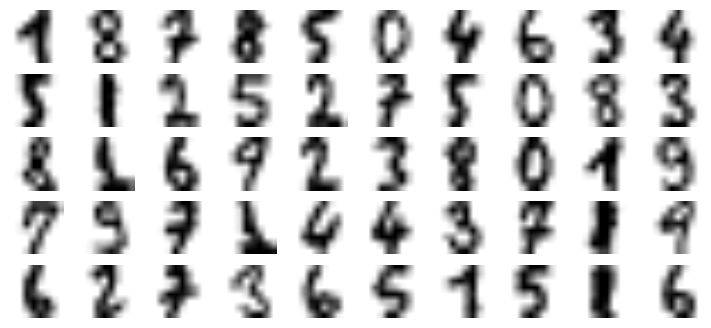

In [53]:
plt.figure(figsize=(9, 4))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

> If we didn't have the labels, we would need to manually look at these and label these manually. Since we have the labels, we'll skip that manual exercise, but be aware it would be necessary.

In [54]:
y_representative_digits = dy_train[representative_digit_idx]
y_representative_digits

array([1, 8, 7, 8, 5, 0, 4, 6, 3, 4, 5, 1, 2, 5, 2, 7, 5, 0, 8, 3, 8, 1,
       6, 9, 2, 3, 8, 0, 1, 9, 7, 9, 7, 1, 4, 4, 3, 7, 1, 9, 6, 2, 7, 3,
       6, 5, 1, 5, 1, 6])

In [55]:
log_reg = LogisticRegression(solver='liblinear')
log_reg = log_reg.fit(X_representative_digits, y_representative_digits)

new_scr = log_reg.score(dX_test, dy_test)
print(f'Accuracy with only 50 representative training examples: {new_scr:.2%}')

Accuracy with only 50 representative training examples: 90.00%


#### Significant improvement in accuracy! Can we do better?
Now we'll iteratively create labels all the instances in the cluster and the closest digit.

In [56]:
kmeans.labels_
# print(dX_train.shape)

array([31,  6,  6, ..., 17, 13, 18], dtype=int32)

In [57]:
pd.Series(kmeans.labels_).value_counts()

31    58
17    54
9     50
27    45
29    44
6     42
19    41
25    39
36    38
14    37
15    37
5     36
11    36
26    36
7     34
16    34
24    33
40    33
3     32
48    32
13    30
38    29
8     29
49    28
12    28
41    28
2     28
32    28
35    28
47    27
45    26
1     26
22    26
18    24
0     22
34    21
10    21
42    20
44    20
30    19
28    17
20    15
39    15
4     15
43    14
33    13
23    13
46    13
21    12
37    11
Name: count, dtype: int64

In [58]:
pd.Series(kmeans.labels_).nunique()

50

In [59]:
y_train_propagated = np.empty(len(dX_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(solver='liblinear')
log_reg = log_reg.fit(dX_train, y_train_propagated)

new_scr = log_reg.score(dX_test, dy_test)
print(f'Accuracy with propagation: {new_scr:.2%}')

Accuracy with propagation: 91.94%


> Another performance boost!

#### What if we only took the closest examples?
We'll try only propagating to the examples in the closest 20th percentile.

In [63]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(dX_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = dX_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

new_scr = log_reg.score(dX_test, dy_test)
print(f'Accuracy with propagation: {new_scr:.2%}')

Accuracy with propagation: 93.06%


# Agglomerative (hierarchical) clustering
Another clustering method builds the clusters as parts of a tree and let's us visualize it via a `dendrogram`.

This can be a useful technique if you expect some type of structure, e.g., you are trying to cluster on recipes. You would expect (hope) the french recipes get grouped together, the Chinese recipes grouped together, ... and then the various variations within those grouped in the terminal nodes.

### Basic Steps
- Compute a distance matrix for the examples (this could be very large).  
- Each example starts as its own cluster.  
- Merge the two closest clusters based on distance.  
- Update the similarity (linkage) matrix.  
- Repeat until one cluster remains.  

This is a bottom-up mode, since we start with the individual examples and slowly group them into more and more heterogenous clusters until we are back to the entire dataset.

- You can use Euclidean distance or a custom method of your choosing. 
- Since this is based on distance; you'll want to standardize your features first!  
- Linkage is how the clusters are compared for similarity to one another:

<img src='./diagrams/linkage.png' style='width: 500px'>

[Image source Machine Learning with Python 3rd Edition Page 368](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch11)

### Hierarchial Clustering with the Wine Data

In [64]:
import pandas as pd

wine = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/ensembles/wine.data', header=None)

wineColumns = ['Type',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline'
]

wine.columns = wineColumns

wine.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [65]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

#### Scale the data and run the algorithm

In [66]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# pretending we don't know the type
wine_X = wine.iloc[:, 1:]

wine_X = StandardScaler().fit_transform(wine_X)

ac = AgglomerativeClustering(n_clusters=5, 
                             metric='euclidean', 
                             linkage='complete',
                             compute_distances=True
                            )

labels = ac.fit_predict(wine_X)

print('Clustering completed.')

Clustering completed.


#### Now we can plot the dendrogram
[`plot_dengrogram` taken from scikit-learn example.](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

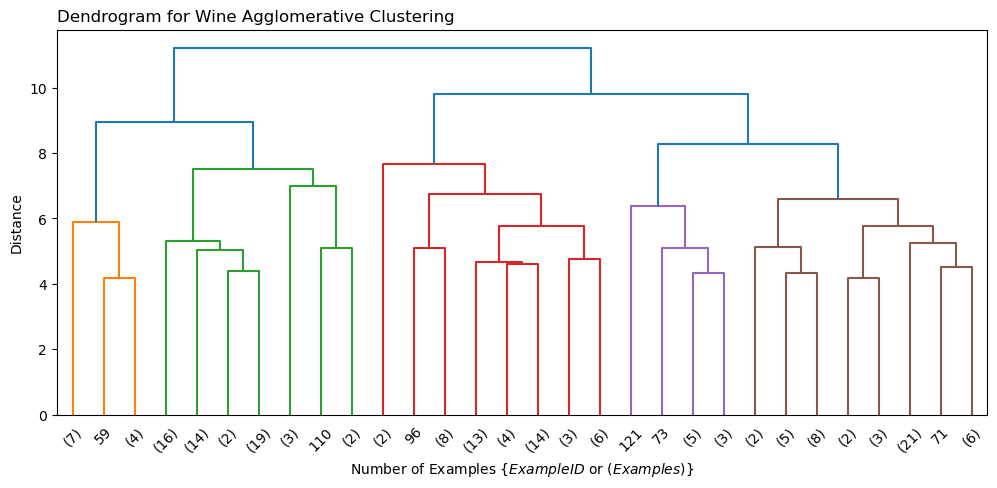

In [67]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plt.figure(figsize=(12,5))
plot_dendrogram(ac, truncate_mode='lastp')
plt.xlabel('Number of Examples {$Example ID$ or $(Examples)$}')
plt.ylabel('Distance')
plt.title('Dendrogram for Wine Agglomerative Clustering', loc='left')
plt.show()

- Can be useful in identifying outliers or seeing how close examples are to one another.  
- Still need to review features to determine what the clusters represent.  

# Density-based Spatial Clustering of Applications with Noise (DBSCAN)

<img src='diagrams/dbscan1.png' style='width: 500px'>

[source](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html)

- Density-based clustering - essentially identifying areas of continuous high density. 
- No assumptions about whether the clusters are spherical or not.  
- No assumptions about hierarchies.  
- Can identity points that are outliers.  

### Each Example is Assigned a Label 
- Core point: if it's sufficiently close to neighbors defined by a minimum number (`MinPts`) falling within a radius, $\epsilon$. Points within $\epsilon$ are also considered its neighborhood.  
- Border point: on the outside border of the cluster boundary, defined by being within the radius ($\epsilon$) of a core point but lacking the minimum number of neighbors.  
- Noise point: think of these as outliers that aren't attached to any clusters.  

### Basic Process
- Create clusters for each core point or connected group. They are considered connected if they are within $\epsilon$.  
- Assign the border points.

<img src='./diagrams/dbscan.png' style='width: 600px'>

[Image source Machine Learning with Python 3rd Edition Page 377](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch11)

<img src='diagrams/dbscan_p.gif' style='width: 600px'>

[source](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html)


### Biggest Advantages
- Identifies noise/outliers. 
- No assumptions on structure.  

## Example with Half-Moons

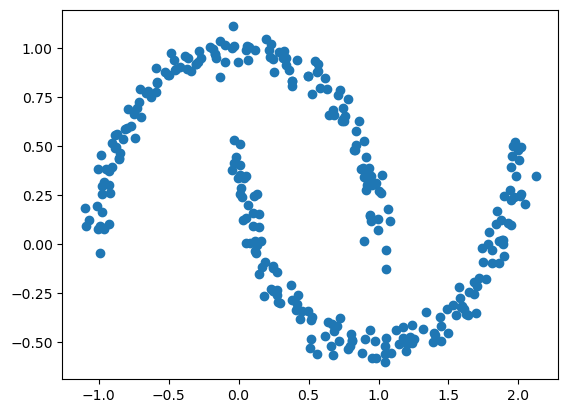

In [68]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

plt.scatter(X[:,0], X[:,1])
plt.show()

### See how k-Means handles this data

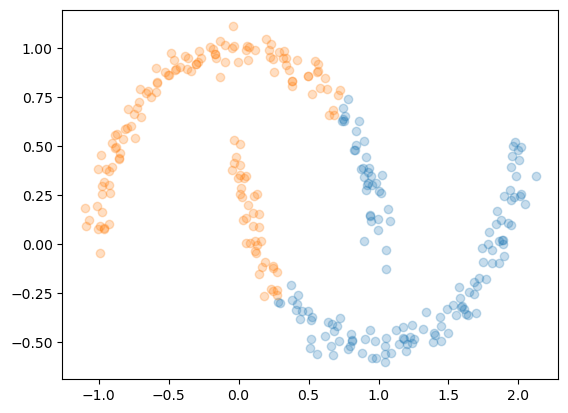

In [69]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, n_init='auto')
km = km.fit(X)

pclusters = km.predict(X)

for i in range(n):
    plt.scatter(X[pclusters==i, 0], X[pclusters==i, 1], alpha=0.25)
plt.show()

> k-Means assumes spherical clusters, so this isn't going to work...  

### Now with DBSCAN
> Note: there isn't a `.predict()` method for DBSCAN since it's meant to identify clusters based on the current dataset. If you needed predictions, you could use the outputs and use with KMeans. See pages 257-258 of *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow*.

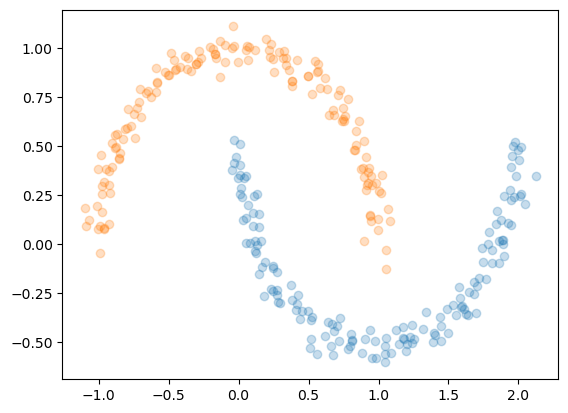

In [70]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
pclusters = db.fit_predict(X)
labs = db.labels_
ulabs = np.unique(labs)

for i in ulabs:
    plt.scatter(X[pclusters==i, 0], X[pclusters==i, 1], alpha=0.25)
plt.show()

- DBSCAN was able to identity the areas of continously density, and thus, the half moons.  
- So for data of arbitrary shapes, this will probably perform better than k-Means or hierarchical clustering.  

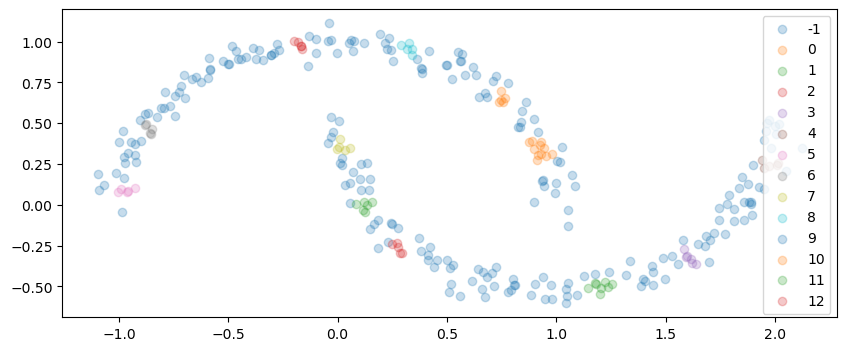

In [71]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.05, min_samples=5, metric='euclidean')
pclusters = db.fit_predict(X)
labs = db.labels_
ulabs = np.unique(labs)

plt.figure(figsize=(10,4))
for i in ulabs:
    plt.scatter(X[pclusters==i, 0], X[pclusters==i, 1], alpha=0.25)
plt.legend(ulabs)
plt.show()

> Setting the radius too small, and nearly everything could be an outlier ($-1$).

### Cons
- Vulnerable to curse of dimensionality (not unique, not something to be aware of).  
- Need to determine $\epsilon$ and the minimum number of points.  
- If the density is very uneven, finding reasonable choices for $\epsilon$ and the minimum points could be challenging.  

# Additional Clustering Algorithms
- [Balance Iterative Reducing and Clustering using Hierarchies (BIRCH)](https://en.wikipedia.org/wiki/BIRCH): designed for very large datasets. Similar to k-means and traditionally has similar results.    
- [Mean-Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html):  Starts with a circle around each example and computes mean of instances within that circle, then centers so the it is centered on the mean. Shifts to areas of higher density. Circles in similar places are assigned to the same cluster. Very computationally complicated and not suitable for bigger datasets.     
- [Affinity](https://en.wikipedia.org/wiki/Affinity_propagation): Voting based.  
- [Spectral clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html): Uses similarity matrix and simple embedding and then uses k-means (or another clustering algorithm).  
- [Gaussian Mixtures](https://scikit-learn.org/stable/modules/mixture.html)

# Let's look at similar people

In [72]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    return people

people = get_data()
people.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [73]:
people.drop('URI', inplace=True, axis=1)
people.shape

(42786, 2)

In [74]:
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [75]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english', max_features=10000)
corpus = vec.fit_transform(people.text)
corpus = corpus.toarray()

In [76]:
corpus
vec.get_feature_names_out()

array(['01', '10', '100', ..., 'zoology', 'zrich', 'zurich'], dtype=object)

In [77]:
vector_df = pd.DataFrame(corpus, columns=vec.get_feature_names_out())
vector_df

,01,10,100,1000,10000,100000,100m,100th,101,102,...,zhang,zhou,zimbabwe,zimbabwean,zombie,zone,zoo,zoology,zrich,zurich
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42783,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
person = people.query('name == "Joe Biden"')
person

,name,text
24478,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...


In [79]:
person.text.values

array(['joseph robinette joe biden jr dosf rbnt badn born november 20 1942 is the 47th and current vice president of the united states jointly elected with president barack obama he is a member of the democratic party and was a united states senator from delaware from january 3 1973 until his resignation on january 15 2009 following his election to the vice presidency in 2012 biden was elected to a second term alongside obamabiden was born in scranton pennsylvania and lived there for ten years before moving to delaware he became an attorney in 1969 and was elected to the new castle county council in 1970 biden was first elected to the senate in 1972 and became the sixthyoungest senator in us history he was reelected to the senate six times and was the fourth most senior senator at the time of his resignation biden was a longtime member and former chairman of the foreign relations committee his strong advocacy helped bring about us military assistance and intervention during the bosnian

In [80]:
person.index

Index([24478], dtype='int64')

In [81]:
# corpus[person.index[0]]
vector_df.iloc[person.index[0]]

01         0
10         0
100        0
1000       0
10000      0
          ..
zone       0
zoo        0
zoology    0
zrich      0
zurich     0
Name: 24478, Length: 10000, dtype: int64

In [82]:
vector_df.iloc[person.index[0]][vector_df.iloc[person.index[0]] > 2]

2012          3
act           5
committee     3
democratic    3
elected       4
obama         4
president     5
senate        3
senator       3
states        3
united        3
vice          5
war           3
Name: 24478, dtype: int64

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity([corpus[person.index[0]]], corpus)
similarity

array([[0.04939966, 0.02836264, 0.03850959, ..., 0.03286175, 0.02918491,
        0.07815824]])

In [84]:
people['similarity'] = similarity[0]
people.head()

,name,text,similarity
0,Digby Morrell,digby morrell born 10 october 1979 is a former...,0.049400
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,0.028363
2,Harpdog Brown,harpdog brown is a singer and harmonica player...,0.038510
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,0.066855
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...,0.014550


In [85]:
people.sort_values(by='similarity', ascending=False)[:10]

,name,text,similarity
24478,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,1.000000
35811,Barack Obama,barack hussein obama ii brk husen bm born augu...,0.502338
31417,Walter Mondale,walter frederick fritz mondale born january 5 ...,0.464199
4408,Joe Lieberman,joseph isadore joe lieberman born february 24 ...,0.412999
39351,John McCain,john sidney mccain iii born august 29 1936 is ...,0.372917
16880,Cynthia Hogan,cynthia c hogan born cincinnati ohio about 195...,0.372817
37868,Dick Cheney,richard bruce dick cheney born january 30 1941...,0.357788
37643,Max Baucus,max sieben baucus born december 11 1941 is the...,0.355817
21186,Mazie Hirono,mazie keiko hirono meij hirono japanese name h...,0.353337
15199,Dan Quayle,james danforth dan quayle kwel born february 4...,0.344677


In [86]:
for i in people.sort_values(by='similarity', ascending=False)[:5].text:
    print(i[:500])
    print('-----')

joseph robinette joe biden jr dosf rbnt badn born november 20 1942 is the 47th and current vice president of the united states jointly elected with president barack obama he is a member of the democratic party and was a united states senator from delaware from january 3 1973 until his resignation on january 15 2009 following his election to the vice presidency in 2012 biden was elected to a second term alongside obamabiden was born in scranton pennsylvania and lived there for ten years before mo
-----
barack hussein obama ii brk husen bm born august 4 1961 is the 44th and current president of the united states and the first african american to hold the office born in honolulu hawaii obama is a graduate of columbia university and harvard law school where he served as president of the harvard law review he was a community organizer in chicago before earning his law degree he worked as a civil rights attorney and taught constitutional law at the university of chicago law school from 1992 

In [87]:
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances

def get_similar_people(name, top=5):
    person = people.query(f'name == "{name}"')
    if len(person)==0:
        print('no match')
        return
    
    similarity = cosine_similarity([corpus[person.index[0]]], corpus)
    people['similarity'] = similarity[0]
    return people.sort_values(by='similarity', ascending=False)[:top]


In [88]:
get_similar_people('Tom Hanks')

,name,text,similarity
12808,Tom Hanks,thomas jeffrey tom hanks born july 9 1956 is a...,1.000000
5875,Michael Keaton,michael john douglas born september 5 1951 bet...,0.544993
16242,Meryl Streep,meryl streep born mary louise streep june 22 1...,0.492965
29556,Felicity Huffman,felicity kendall huffman born december 9 1962 ...,0.492746
39923,Jack Nicholson,john joseph jack nicholson born april 22 1937 ...,0.486095


In [89]:
for i in get_similar_people('Aamir Khan').text:
    print(i[:500])
    print('------')


aamir khan pronounced amr xan born mohammed aamir hussain khan on 14 march 1965 is an indian film actor director screenwriter producer and television presenter through his successful career in hindi films khan has established himself as one of the most popular and influential actors of indian cinema he is the recipient of numerous awards including four national film awards and seven filmfare awards he was honoured by the government of india with the padma shri in 2003 and the padma bhushan in 20
------
jugal hansraj born 26 july 1972 is an indian actor and a national award winning director based in mumbaihansraj started his career as a child in the 1983 film masoom which starred naseeruddin shah and shabana azmi the film was about a 9yearold boy whose stepmother was not willing to accept him into the family because he was born out of an extramarital relationship masoom was based on man woman and child a novel by erich segal the film had a positive response and launched hansrajs career 

# Brief interlude for topic modeling
40+ thousand biographies is way too many documents for individuals to read. We can use `Latent Dirichlet Allocation` to reduce the text into topic vectors so we understand what is being stated (generally) in the documents with relatively little overhead.

In a nutshell, it finds words that frequently appear together across documents. It uses two matrices (1) `document-to-topic` and (2) `word-to-topic` that when multiplied together reproduce the bag-of-words matrix.  Like PCA, you `need to define the number of topics`.

Starting with the word frequencies of the `wikipedia` data:

In [90]:
import datetime

from sklearn.feature_extraction.text import CountVectorizer

st = datetime.datetime.now()

# exclude words that occur in more than 10% of the documents
# include most common 5000 words
count = CountVectorizer(stop_words='english', max_df=.1, max_features=5000)

X = count.fit_transform(people['text'].values)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, 
                               random_state=10, 
                               learning_method='batch'
                              )

X_topics = lda.fit_transform(X)

en = datetime.datetime.now()

el = en-st

print(f'Time to complete: {el}')

Time to complete: 0:00:58.687350


Word importances for each of the 5,000 words for each topic:

In [91]:
lda.components_.shape

(10, 5000)

In [92]:
top_words = 5

feature_names = count.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f'Topic {topic_idx+1}')
    print(','.join([feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]))

Topic 1
album,band,tour,song,records
Topic 2
football,coach,cup,game,championship
Topic 3
business,technology,design,engineering,science
Topic 4
canadian,canada,royal,australian,australia
Topic 5
art,jazz,artist,museum,festival
Topic 6
magazine,writing,writer,editor,press
Topic 7
radio,news,bbc,tv,sports
Topic 8
films,theatre,actor,directed,production
Topic 9
law,education,health,studies,department
Topic 10
party,election,minister,government,court


> You would need to convert these into logical categories to present to your boss. You would want to check the topics match the text, since LDA can extract topics that aren't much stronger than random noise.

In [93]:
feature_names = count.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f'Topic {topic_idx+1}')
    print(','.join([feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]))
    
    topic = X_topics[:, topic_idx].argsort()[::-1]
    
    for iter_idx, movie_idx in enumerate(topic[:3]):
        print(people['name'][movie_idx], people['text'][movie_idx][:300], '...')
        
    print ('------------')

Topic 1
album,band,tour,song,records
Fabio Santus fabio santus born clusone may 26 1976 is an italian cross country skier who has competed since 1995 his best world cup finish was second in a 4 x 10 km event in switzerland in 2007 while santuss best individual finish was fifth in a 15 km 15 km double pursuit event in sweden in 2004competing in two  ...
Giorgio Vanzetta giorgio vanzetta born cavalese 9 october 1959 is an italian former crosscountry skier who competed from 1982 to 2002 his best known victory was part of the 4 x 10 km relay team that upset norway at the 1994 winter olympics in lillehammer he also won three medals at the 1992 winter olympics in albert ...
Kelly Clarkson kelly brianne clarkson born april 24 1982 is an american singer and songwriter in 2002 she rose to fame after winning the first season of american idol and has since been established as the original american idol her debut single a moment like this topped the us billboard hot 100 and broke the recor ...
---

> Seem reasonable?

# Readings
- [Stanford k-Means Notes](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)  
- [Dendrogram Gallery](https://www.r-graph-gallery.com/dendrogram.html)  
- [DBSCAN Paper](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)  
- [Fast Algorithms for Association Rule Mining](http://www.vldb.org/conf/1994/P487.PDF)  
- [Non-negative Matrix Factorization Wiki](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)  
- [Non-negative Matrix Factorization Example](https://medium.com/logicai/non-negative-matrix-factorization-for-recommendation-systems-985ca8d5c16c)